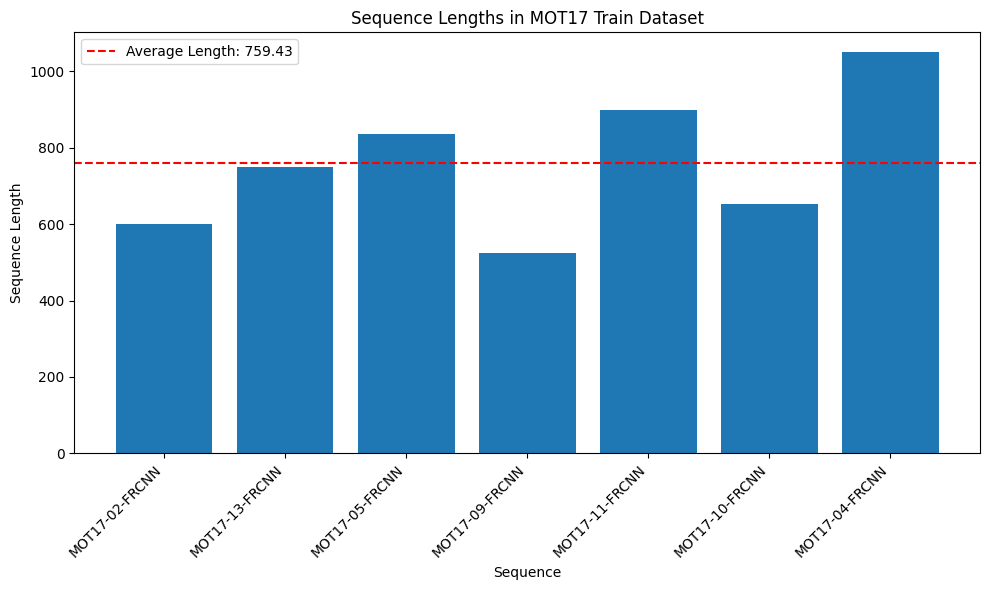

In [24]:
import os
from configparser import ConfigParser
import matplotlib.pyplot as plt

# Path to the root directory of the MOT17 train dataset
mot17_train_dir = '/home/juma/code/luqmon_tracking/examples/val_utils/data/MOT17/train'


def read_seq_length(seqinfo_ini_path):
    parser = ConfigParser()
    parser.read(seqinfo_ini_path)
    seq_length = int(parser.get('Sequence', 'seqLength'))
    return seq_length


seq_lengths = []

selected_dirs = []
# Iterate over sequence directories
for sequence_dir in os.listdir(mot17_train_dir):
    if 'FRCNN' not in sequence_dir:
        continue
    selected_dirs.append(sequence_dir)
    seqinfo_ini_path = os.path.join(
        mot17_train_dir, sequence_dir, 'seqinfo.ini')

    # Check if seqinfo.ini file exists for the sequence
    if os.path.isfile(seqinfo_ini_path):
        seq_length = read_seq_length(seqinfo_ini_path)
        seq_lengths.append(seq_length)

# Calculate the average sequence length
average_seq_length = sum(seq_lengths) / len(seq_lengths)

# Create a plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(seq_lengths)), seq_lengths,
        tick_label=selected_dirs)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sequence')
plt.ylabel('Sequence Length')
plt.title('Sequence Lengths in MOT17 Train Dataset')

# Add red dashed line for the average sequence length
plt.axhline(y=average_seq_length, color='red', linestyle='dashed',
            label=f'Average Length: {average_seq_length:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# VIRAT to MOT-Style


In [25]:
DATADIR = 'assets/virat'


def read_num_frames(gt_tracks_path):
    max_frame_id = 0
    with open(gt_tracks_path, 'r') as f:
        for line in f:
            fields = line.strip().split()
            obj_id = int(fields[0])
            obj_duration = int(fields[1])
            frame_id = int(fields[2])

            if frame_id > max_frame_id:
                max_frame_id = frame_id

    num_frames = max_frame_id + 1
    return num_frames

In [26]:
import glob


def get_category(length_in_frames):
    if length_in_frames < 1000:
        return 'short'
    elif length_in_frames < 10000:
        return 'medium'
    else:
        return 'long'


num_frames = [read_num_frames(video)
              for video in sorted(glob.glob(f'{DATADIR}/annotations/*.viratdata.objects.txt'))]
video_names = [video
               for video in sorted(glob.glob(f'{DATADIR}/annotations/*.viratdata.objects.txt'))]
video_category = [get_category(length_in_frames)
                  for length_in_frames in num_frames]

print(
    video_category[:10]
)
print(num_frames[:10])

['long', 'medium', 'long', 'long', 'long', 'long', 'long', 'medium', 'medium', 'medium']
[20656, 9076, 20941, 16773, 17210, 20338, 29578, 2115, 1260, 7244]


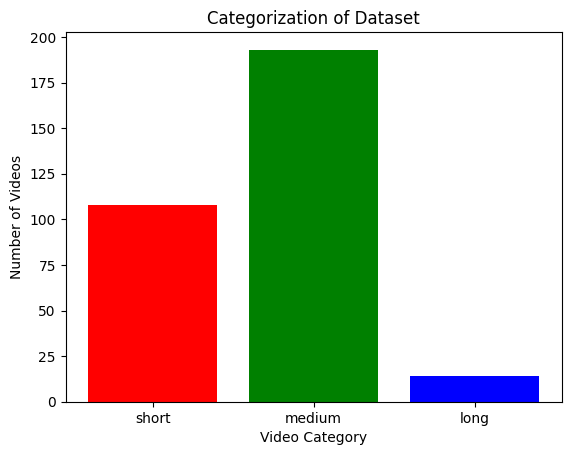

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = np.array(['short', 'medium', 'long'])
counts = np.array([108, 193, 14])

# Create a bar plot
plt.bar(categories, counts, color=['red', 'green', 'blue'])
plt.xlabel('Video Category')
plt.ylabel('Number of Videos')
plt.title('Categorization of Dataset')
plt.show()

In [28]:
import ntpath
# Categorize video names
short_video_names = []
medium_video_names = []
long_video_names = []

for video_name, category in zip(video_names, video_category):
    video_name = ntpath.basename(video_name).replace(
        '.viratdata.objects.txt', '.mp4')
    if category == 'short':
        short_video_names.append(video_name)
    elif category == 'medium':
        medium_video_names.append(video_name)
    elif category == 'long':
        long_video_names.append(video_name)

# Print or use the categorized video names as needed
print("Short Video Names:", len(short_video_names))
print("Medium Video Names:", len(medium_video_names))
print("Long Video Names:", len(long_video_names))

Short Video Names: 108
Medium Video Names: 193
Long Video Names: 14


In [32]:
import shutil
from tqdm import tqdm

source_directory = '/home/juma/code/luqmon_tracking/assets/virat/all_vids'
destination_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/videos'


# Iterate through short video names and copy videos
for video_name in tqdm(short_video_names):
    source_video_path = f"{source_directory}/{video_name}"
    destination_video_path = f"{destination_directory}/{video_name}"

    try:
        shutil.copy(source_video_path, destination_video_path)
        print(f"Successfully copied {video_name}")
    except FileNotFoundError:
        print(
            f"Video {video_name} not found in the source  {source_video_path}")
    except Exception as e:
        print(f"Error copying {video_name}: {str(e)}")

 13%|█▎        | 14/108 [00:00<00:00, 139.47it/s]

Video VIRAT_S_000201_02_000590_000623.mp4 not found in the source  /home/juma/code/luqmon_tracking/assets/virat/all_vids/VIRAT_S_000201_02_000590_000623.mp4
Video VIRAT_S_000201_03_000640_000672.mp4 not found in the source  /home/juma/code/luqmon_tracking/assets/virat/all_vids/VIRAT_S_000201_03_000640_000672.mp4
Video VIRAT_S_000203_08_001702_001734.mp4 not found in the source  /home/juma/code/luqmon_tracking/assets/virat/all_vids/VIRAT_S_000203_08_001702_001734.mp4
Video VIRAT_S_000207_02_000498_000530.mp4 not found in the source  /home/juma/code/luqmon_tracking/assets/virat/all_vids/VIRAT_S_000207_02_000498_000530.mp4
Video VIRAT_S_000207_04_000902_000934.mp4 not found in the source  /home/juma/code/luqmon_tracking/assets/virat/all_vids/VIRAT_S_000207_04_000902_000934.mp4
Successfully copied VIRAT_S_010000_02_000388_000421.mp4
Successfully copied VIRAT_S_010000_06_000728_000762.mp4
Successfully copied VIRAT_S_010000_07_000827_000860.mp4
Successfully copied VIRAT_S_010001_03_000537_00

 39%|███▉      | 42/108 [00:00<00:00, 131.54it/s]

Successfully copied VIRAT_S_010003_08_000739_000778.mp4
Successfully copied VIRAT_S_010003_10_000901_000934.mp4
Successfully copied VIRAT_S_010003_11_000956_000982.mp4
Successfully copied VIRAT_S_010004_00_000064_000100.mp4
Successfully copied VIRAT_S_010004_01_000163_000188.mp4
Successfully copied VIRAT_S_010004_02_000191_000237.mp4
Successfully copied VIRAT_S_010004_03_000239_000277.mp4
Successfully copied VIRAT_S_010005_00_000048_000075.mp4
Successfully copied VIRAT_S_010005_02_000177_000203.mp4
Successfully copied VIRAT_S_010005_04_000299_000323.mp4
Successfully copied VIRAT_S_010005_05_000397_000430.mp4
Successfully copied VIRAT_S_010005_06_000475_000499.mp4
Successfully copied VIRAT_S_010005_07_000535_000584.mp4
Successfully copied VIRAT_S_010005_08_000647_000693.mp4
Successfully copied VIRAT_S_010106_01_000493_000526.mp4
Successfully copied VIRAT_S_010106_02_000656_000692.mp4
Successfully copied VIRAT_S_010106_05_000954_000996.mp4
Successfully copied VIRAT_S_010107_00_000019_000

 63%|██████▎   | 68/108 [00:00<00:00, 108.00it/s]

Successfully copied VIRAT_S_010110_05_000899_000935.mp4
Successfully copied VIRAT_S_010111_00_000000_000032.mp4
Successfully copied VIRAT_S_010111_04_000718_000760.mp4
Successfully copied VIRAT_S_010111_05_000762_000799.mp4
Successfully copied VIRAT_S_010111_06_000820_000860.mp4
Successfully copied VIRAT_S_010111_07_000872_000909.mp4
Successfully copied VIRAT_S_010111_08_000920_000954.mp4
Successfully copied VIRAT_S_010111_09_000981_001014.mp4
Successfully copied VIRAT_S_010113_02_000434_000479.mp4
Successfully copied VIRAT_S_010113_05_000776_000805.mp4
Successfully copied VIRAT_S_010113_07_000965_001013.mp4
Successfully copied VIRAT_S_010114_02_000765_000802.mp4
Successfully copied VIRAT_S_010115_02_000485_000516.mp4
Successfully copied VIRAT_S_010200_05_000658_000700.mp4
Successfully copied VIRAT_S_010200_06_000702_000744.mp4
Successfully copied VIRAT_S_010200_08_000838_000867.mp4
Successfully copied VIRAT_S_010200_09_000886_000915.mp4
Successfully copied VIRAT_S_010200_10_000923_000

 75%|███████▌  | 81/108 [00:00<00:00, 111.99it/s]

Successfully copied VIRAT_S_010201_05_000499_000527.mp4
Successfully copied VIRAT_S_010201_08_000705_000739.mp4
Successfully copied VIRAT_S_010201_09_000770_000801.mp4
Successfully copied VIRAT_S_010202_00_000001_000033.mp4
Successfully copied VIRAT_S_010202_02_000161_000189.mp4
Successfully copied VIRAT_S_010202_03_000313_000355.mp4
Successfully copied VIRAT_S_010203_03_000400_000435.mp4
Successfully copied VIRAT_S_010203_09_001010_001036.mp4
Successfully copied VIRAT_S_010203_10_001092_001121.mp4
Successfully copied VIRAT_S_010204_00_000030_000059.mp4
Successfully copied VIRAT_S_010204_03_000606_000632.mp4
Successfully copied VIRAT_S_010204_05_000856_000890.mp4
Successfully copied VIRAT_S_010204_06_000913_000939.mp4
Successfully copied VIRAT_S_010204_07_000942_000989.mp4
Successfully copied VIRAT_S_010204_10_001372_001395.mp4
Successfully copied VIRAT_S_010205_03_000370_000395.mp4
Successfully copied VIRAT_S_010205_04_000545_000576.mp4
Successfully copied VIRAT_S_010206_00_000007_000

 97%|█████████▋| 105/108 [00:00<00:00, 93.10it/s]

Successfully copied VIRAT_S_010207_01_000712_000752.mp4
Successfully copied VIRAT_S_010207_02_000790_000816.mp4
Successfully copied VIRAT_S_010207_04_000929_000954.mp4
Successfully copied VIRAT_S_010207_05_001013_001038.mp4
Successfully copied VIRAT_S_010207_06_001064_001097.mp4
Successfully copied VIRAT_S_010207_08_001308_001332.mp4
Successfully copied VIRAT_S_010207_09_001484_001510.mp4
Successfully copied VIRAT_S_010208_02_000150_000180.mp4
Successfully copied VIRAT_S_010208_03_000201_000232.mp4
Successfully copied VIRAT_S_010208_05_000591_000631.mp4
Successfully copied VIRAT_S_010208_07_000768_000791.mp4
Successfully copied VIRAT_S_010208_08_000807_000831.mp4
Successfully copied VIRAT_S_010208_09_000857_000886.mp4
Successfully copied VIRAT_S_040000_00_000063_000085.mp4
Successfully copied VIRAT_S_050000_10_001462_001491.mp4
Successfully copied VIRAT_S_050000_12_001591_001619.mp4


100%|██████████| 108/108 [00:01<00:00, 83.63it/s]

Successfully copied VIRAT_S_050203_06_001202_001264.mp4


In [27]:
import shutil
from tqdm import tqdm


destination_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/videos'

## Extract frames


In [ ]:
'VIRAT_S_050000_10_001462_001491', 'VIRAT_S_010206_03_000546_000580', 'VIRAT_S_010005_04_000299_000323', 'VIRAT_S_010109_07_000876_000910', 'VIRAT_S_010200_10_000923_000959', 'VIRAT_S_010200_09_000886_000915', 'VIRAT_S_010004_02_000191_000237', 'VIRAT_S_010003_01_000111_000137', 'VIRAT_S_010200_05_000658_000700', 'VIRAT_S_010201_05_000499_000527', 'VIRAT_S_010208_08_000807_000831', 'VIRAT_S_010001_05_000649_000684', 'VIRAT_S_010110_04_000777_000812', 'VIRAT_S_010106_05_000954_000996', 'VIRAT_S_010110_05_000899_000935', 'VIRAT_S_010208_07_000768_000791', 'VIRAT_S_010111_05_000762_000799', 'VIRAT_S_010201_01_000125_000152', 'VIRAT_S_010207_01_000712_000752', 'VIRAT_S_010206_04_000720_000767', 'VIRAT_S_010204_05_000856_000890', 'VIRAT_S_010205_03_000370_000395', 'VIRAT_S_010004_01_000163_000188', 'VIRAT_S_010002_04_000307_000350', 'VIRAT_S_050000_12_001591_001619', 'VIRAT_S_010114_02_000765_000802', 'VIRAT_S_010202_02_000161_000189', 'VIRAT_S_010003_11_000956_000982', 'VIRAT_S_010202_00_000001_000033', 'VIRAT_S_010207_06_001064_001097', 'VIRAT_S_010207_02_000790_000816', 'VIRAT_S_010107_00_000019_000057', 'VIRAT_S_010202_03_000313_000355', 'VIRAT_S_010111_00_000000_000032', 'VIRAT_S_010200_08_000838_000867', 'VIRAT_S_010002_05_000397_000420', 'VIRAT_S_010203_10_001092_001121', 'VIRAT_S_010111_09_000981_001014', 'VIRAT_S_010111_07_000872_000909', 'VIRAT_S_010002_01_000123_000148', 'VIRAT_S_010002_02_000174_000204', 'VIRAT_S_010003_03_000219_000259', 'VIRAT_S_010002_06_000441_000467', 'VIRAT_S_010001_06_000685_000722', 'VIRAT_S_010207_09_001484_001510', 'VIRAT_S_010206_00_000007_000035', 'VIRAT_S_010204_07_000942_000989', 'VIRAT_S_010208_09_000857_000886', 'VIRAT_S_010001_03_000537_000563', 'VIRAT_S_010207_08_001308_001332', 'VIRAT_S_010205_04_000545_000576', 'VIRAT_S_010106_01_000493_000526', 'VIRAT_S_010005_06_000475_000499', 'VIRAT_S_010204_06_000913_000939', 'VIRAT_S_010201_09_000770_000801', 'VIRAT_S_010003_05_000499_000523', 'VIRAT_S_010002_07_000522_000547', 'VIRAT_S_010208_02_000150_000180', 'VIRAT_S_040000_00_000063_000085', 'VIRAT_S_010005_02_000177_000203', 'VIRAT_S_010113_07_000965_001013', 'VIRAT_S_010207_04_000929_000954', 'VIRAT_S_010005_00_000048_000075', 'VIRAT_S_010115_02_000485_000516', 'VIRAT_S_010201_02_000167_000197', 'VIRAT_S_010111_06_000820_000860', 'VIRAT_S_010203_03_000400_000435', 'VIRAT_S_010001_09_000921_000952', 'VIRAT_S_010113_02_000434_000479', 'VIRAT_S_010000_06_000728_000762', 'VIRAT_S_010207_05_001013_001038', 'VIRAT_S_010204_00_000030_000059', 'VIRAT_S_010005_05_000397_000430', 'VIRAT_S_010002_03_000236_000261', 'VIRAT_S_010204_03_000606_000632', 'VIRAT_S_010001_10_000962_001005', 'VIRAT_S_010000_07_000827_000860', 'VIRAT_S_010208_03_000201_000232', 'VIRAT_S_010004_03_000239_000277', 'VIRAT_S_010003_07_000608_000636', 'VIRAT_S_010111_04_000718_000760', 'VIRAT_S_010111_08_000920_000954', 'VIRAT_S_010110_00_000000_000021', 'VIRAT_S_010003_02_000165_000202', 'VIRAT_S_010208_05_000591_000631', 'VIRAT_S_010206_02_000414_000439', 'VIRAT_S_010106_02_000656_000692', 'VIRAT_S_010206_05_000797_000823', 'VIRAT_S_010201_08_000705_000739', 'VIRAT_S_010003_10_000901_000934', 'VIRAT_S_010004_00_000064_000100', 'VIRAT_S_010003_06_000526_000560', 'VIRAT_S_010003_08_000739_000778', 'VIRAT_S_010204_10_001372_001395', 'VIRAT_S_010203_09_001010_001036', 'VIRAT_S_010005_07_000535_000584', 'VIRAT_S_010107_02_000282_000312', 'VIRAT_S_010113_05_000776_000805', 'VIRAT_S_010200_06_000702_000744', 'VIRAT_S_010005_08_000647_000693', 'VIRAT_S_010110_03_000712_000739'

In [1]:
from glob import glob
from os.path import join, basename, splitext
import shutil
from tqdm import tqdm
import cv2
import os

destination_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/train'

for video_path in tqdm(glob(f'/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/videos/*.mp4')):
    video_name = splitext(basename(video_path))[0]

    # Create a directory for the video
    video_directory_path = join(destination_directory, video_name)
    os.makedirs(video_directory_path, exist_ok=True)

    # Create a directory for frames
    frames_directory_path = join(video_directory_path, 'img1')
    os.makedirs(frames_directory_path, exist_ok=True)

    # Read video frames and save to frames directory
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_filename = f"{frame_count+1:06d}.jpg"

        frame_path = join(frames_directory_path, frame_filename)
        # if frame_count == 0:
        #     print(frame_path)
        cv2.imwrite(frame_path, frame)
        frame_count += 1

    cap.release()
    print(f"Processed video {video_name}")

  1%|          | 1/103 [00:11<18:46, 11.04s/it]

Processed video VIRAT_S_010113_02_000434_000479


  2%|▏         | 2/103 [00:35<32:19, 19.21s/it]

Processed video VIRAT_S_050000_10_001462_001491


  3%|▎         | 3/103 [00:43<23:09, 13.89s/it]

Processed video VIRAT_S_010003_10_000901_000934


  4%|▍         | 4/103 [00:49<17:51, 10.82s/it]

Processed video VIRAT_S_010113_05_000776_000805


  5%|▍         | 5/103 [00:57<15:57,  9.77s/it]

Processed video VIRAT_S_010203_03_000400_000435


  6%|▌         | 6/103 [01:05<14:47,  9.15s/it]

Processed video VIRAT_S_010201_01_000125_000152


  7%|▋         | 7/103 [01:11<13:07,  8.20s/it]

Processed video VIRAT_S_010207_02_000790_000816


  8%|▊         | 8/103 [01:20<13:12,  8.34s/it]

Processed video VIRAT_S_010207_01_000712_000752


  9%|▊         | 9/103 [02:12<34:15, 21.87s/it]

Processed video VIRAT_S_050203_06_001202_001264


 10%|▉         | 10/103 [02:18<26:43, 17.24s/it]

Processed video VIRAT_S_010203_10_001092_001121


 11%|█         | 11/103 [02:24<20:54, 13.64s/it]

Processed video VIRAT_S_010110_03_000712_000739


 12%|█▏        | 12/103 [02:34<18:52, 12.44s/it]

Processed video VIRAT_S_010001_06_000685_000722


 13%|█▎        | 13/103 [02:38<15:02, 10.03s/it]

Processed video VIRAT_S_010207_05_001013_001038


 14%|█▎        | 14/103 [02:45<13:29,  9.09s/it]

Processed video VIRAT_S_010106_01_000493_000526


 15%|█▍        | 15/103 [02:51<12:08,  8.28s/it]

Processed video VIRAT_S_010204_05_000856_000890


 16%|█▌        | 16/103 [02:58<11:28,  7.91s/it]

Processed video VIRAT_S_010201_09_000770_000801


 17%|█▋        | 17/103 [03:08<12:14,  8.54s/it]

Processed video VIRAT_S_010111_06_000820_000860


 17%|█▋        | 18/103 [03:16<11:38,  8.22s/it]

Processed video VIRAT_S_010106_05_000954_000996


 18%|█▊        | 19/103 [03:21<10:04,  7.20s/it]

Processed video VIRAT_S_010204_10_001372_001395


 19%|█▉        | 20/103 [03:31<11:18,  8.17s/it]

Processed video VIRAT_S_010003_08_000739_000778


 20%|██        | 21/103 [03:41<11:46,  8.62s/it]

Processed video VIRAT_S_010106_02_000656_000692


 21%|██▏       | 22/103 [03:45<09:39,  7.16s/it]

Processed video VIRAT_S_010111_09_000981_001014


 22%|██▏       | 23/103 [03:55<10:57,  8.22s/it]

Processed video VIRAT_S_010204_07_000942_000989


 23%|██▎       | 24/103 [04:06<11:37,  8.83s/it]

Processed video VIRAT_S_010206_04_000720_000767


 24%|██▍       | 25/103 [04:17<12:36,  9.70s/it]

Processed video VIRAT_S_010111_04_000718_000760


 25%|██▌       | 26/103 [04:28<12:48,  9.98s/it]

Processed video VIRAT_S_010003_02_000165_000202


 26%|██▌       | 27/103 [04:35<11:42,  9.25s/it]

Processed video VIRAT_S_010002_02_000174_000204


 27%|██▋       | 28/103 [04:44<11:24,  9.12s/it]

Processed video VIRAT_S_010111_00_000000_000032


 28%|██▊       | 29/103 [04:50<10:08,  8.22s/it]

Processed video VIRAT_S_010005_04_000299_000323


 29%|██▉       | 30/103 [05:02<11:06,  9.13s/it]

Processed video VIRAT_S_010004_02_000191_000237


 30%|███       | 31/103 [05:08<09:49,  8.19s/it]

Processed video VIRAT_S_010202_00_000001_000033


 31%|███       | 32/103 [05:12<08:24,  7.10s/it]

Processed video VIRAT_S_010204_03_000606_000632


 32%|███▏      | 33/103 [05:20<08:29,  7.27s/it]

Processed video VIRAT_S_010110_04_000777_000812


 33%|███▎      | 34/103 [05:25<07:40,  6.67s/it]

Processed video VIRAT_S_010003_01_000111_000137


 34%|███▍      | 35/103 [05:31<07:20,  6.48s/it]

Processed video VIRAT_S_010111_08_000920_000954


 35%|███▍      | 36/103 [05:36<06:36,  5.92s/it]

Processed video VIRAT_S_010206_05_000797_000823


 36%|███▌      | 37/103 [05:44<07:12,  6.55s/it]

Processed video VIRAT_S_010208_05_000591_000631


 37%|███▋      | 38/103 [05:50<06:57,  6.43s/it]

Processed video VIRAT_S_010005_02_000177_000203


 38%|███▊      | 39/103 [05:54<06:12,  5.82s/it]

Processed video VIRAT_S_010205_03_000370_000395


 39%|███▉      | 40/103 [06:00<05:56,  5.66s/it]

Processed video VIRAT_S_010208_02_000150_000180


 40%|███▉      | 41/103 [06:06<06:01,  5.83s/it]

Processed video VIRAT_S_010004_00_000064_000100


 41%|████      | 42/103 [06:21<08:38,  8.51s/it]

Processed video VIRAT_S_040000_00_000063_000085


 42%|████▏     | 43/103 [06:39<11:33, 11.55s/it]

Processed video VIRAT_S_050000_12_001591_001619


 43%|████▎     | 44/103 [06:44<09:24,  9.57s/it]

Processed video VIRAT_S_010206_02_000414_000439


 44%|████▎     | 45/103 [06:50<08:10,  8.46s/it]

Processed video VIRAT_S_010115_02_000485_000516


 45%|████▍     | 46/103 [06:55<07:06,  7.48s/it]

Processed video VIRAT_S_010205_04_000545_000576


 46%|████▌     | 47/103 [07:01<06:24,  6.86s/it]

Processed video VIRAT_S_010005_00_000048_000075


 47%|████▋     | 48/103 [07:07<06:10,  6.74s/it]

Processed video VIRAT_S_010110_05_000899_000935


 48%|████▊     | 49/103 [07:15<06:29,  7.22s/it]

Processed video VIRAT_S_010001_10_000962_001005


 49%|████▊     | 50/103 [07:20<05:45,  6.51s/it]

Processed video VIRAT_S_010110_00_000000_000021


 50%|████▉     | 51/103 [07:25<05:12,  6.01s/it]

Processed video VIRAT_S_010003_07_000608_000636


 50%|█████     | 52/103 [07:31<05:10,  6.08s/it]

Processed video VIRAT_S_010204_00_000030_000059


 51%|█████▏    | 53/103 [07:35<04:31,  5.44s/it]

Processed video VIRAT_S_010208_08_000807_000831


 52%|█████▏    | 54/103 [07:40<04:19,  5.31s/it]

Processed video VIRAT_S_010002_03_000236_000261


 53%|█████▎    | 55/103 [07:48<04:47,  5.98s/it]

Processed video VIRAT_S_010111_07_000872_000909


 54%|█████▍    | 56/103 [07:56<05:14,  6.70s/it]

Processed video VIRAT_S_010113_07_000965_001013


 55%|█████▌    | 57/103 [08:02<04:50,  6.32s/it]

Processed video VIRAT_S_010206_00_000007_000035


 56%|█████▋    | 58/103 [08:08<04:37,  6.16s/it]

Processed video VIRAT_S_010000_02_000388_000421


 57%|█████▋    | 59/103 [08:12<04:04,  5.57s/it]

Processed video VIRAT_S_010207_09_001484_001510


 58%|█████▊    | 60/103 [08:19<04:25,  6.17s/it]

Processed video VIRAT_S_010200_06_000702_000744


 59%|█████▉    | 61/103 [08:28<04:45,  6.79s/it]

Processed video VIRAT_S_010107_00_000019_000057


 60%|██████    | 62/103 [08:32<04:14,  6.22s/it]

Processed video VIRAT_S_010001_03_000537_000563


 61%|██████    | 63/103 [08:38<04:01,  6.03s/it]

Processed video VIRAT_S_010001_09_000921_000952


 62%|██████▏   | 64/103 [08:45<04:04,  6.26s/it]

Processed video VIRAT_S_010003_06_000526_000560


 63%|██████▎   | 65/103 [08:50<03:43,  5.89s/it]

Processed video VIRAT_S_010004_01_000163_000188


 64%|██████▍   | 66/103 [08:54<03:21,  5.45s/it]

Processed video VIRAT_S_010201_02_000167_000197


 65%|██████▌   | 67/103 [09:02<03:39,  6.11s/it]

Processed video VIRAT_S_010000_06_000728_000762


 66%|██████▌   | 68/103 [09:07<03:25,  5.87s/it]

Processed video VIRAT_S_010002_01_000123_000148


 67%|██████▋   | 69/103 [09:14<03:24,  6.02s/it]

Processed video VIRAT_S_010200_09_000886_000915


 68%|██████▊   | 70/103 [09:20<03:24,  6.18s/it]

Processed video VIRAT_S_010200_10_000923_000959


 69%|██████▉   | 71/103 [09:25<03:00,  5.63s/it]

Processed video VIRAT_S_010002_06_000441_000467


 70%|██████▉   | 72/103 [09:30<02:56,  5.70s/it]

Processed video VIRAT_S_010201_05_000499_000527


 71%|███████   | 73/103 [09:40<03:28,  6.96s/it]

Processed video VIRAT_S_010005_07_000535_000584


 72%|███████▏  | 74/103 [09:45<03:04,  6.36s/it]

Processed video VIRAT_S_010202_02_000161_000189


 73%|███████▎  | 75/103 [09:50<02:48,  6.01s/it]

Processed video VIRAT_S_010208_03_000201_000232


 74%|███████▍  | 76/103 [09:57<02:43,  6.06s/it]

Processed video VIRAT_S_010206_03_000546_000580


 75%|███████▍  | 77/103 [10:00<02:14,  5.18s/it]

Processed video VIRAT_S_010002_05_000397_000420


 76%|███████▌  | 78/103 [10:08<02:29,  5.98s/it]

Processed video VIRAT_S_010109_07_000876_000910


 77%|███████▋  | 79/103 [10:12<02:14,  5.61s/it]

Processed video VIRAT_S_010204_06_000913_000939


 78%|███████▊  | 80/103 [10:21<02:29,  6.52s/it]

Processed video VIRAT_S_010002_04_000307_000350


 79%|███████▊  | 81/103 [10:26<02:15,  6.14s/it]

Processed video VIRAT_S_010003_11_000956_000982


 80%|███████▉  | 82/103 [10:32<02:03,  5.90s/it]

Processed video VIRAT_S_010005_05_000397_000430


 81%|████████  | 83/103 [10:38<02:02,  6.11s/it]

Processed video VIRAT_S_010114_02_000765_000802


 82%|████████▏ | 84/103 [10:47<02:09,  6.83s/it]

Processed video VIRAT_S_010005_08_000647_000693


 83%|████████▎ | 85/103 [10:51<01:47,  6.00s/it]

Processed video VIRAT_S_010207_08_001308_001332


 83%|████████▎ | 86/103 [10:54<01:29,  5.24s/it]

Processed video VIRAT_S_010207_04_000929_000954


 84%|████████▍ | 87/103 [11:01<01:29,  5.57s/it]

Processed video VIRAT_S_010001_05_000649_000684


 85%|████████▌ | 88/103 [11:09<01:38,  6.54s/it]

Processed video VIRAT_S_010004_03_000239_000277


 86%|████████▋ | 89/103 [11:15<01:29,  6.38s/it]

Processed video VIRAT_S_010000_07_000827_000860


 87%|████████▋ | 90/103 [11:22<01:22,  6.35s/it]

Processed video VIRAT_S_010111_05_000762_000799


 88%|████████▊ | 91/103 [11:26<01:09,  5.80s/it]

Processed video VIRAT_S_010005_06_000475_000499


 89%|████████▉ | 92/103 [11:30<00:56,  5.11s/it]

Processed video VIRAT_S_010002_07_000522_000547


 90%|█████████ | 93/103 [11:35<00:51,  5.20s/it]

Processed video VIRAT_S_010203_09_001010_001036


 91%|█████████▏| 94/103 [11:42<00:50,  5.63s/it]

Processed video VIRAT_S_010201_08_000705_000739


 92%|█████████▏| 95/103 [11:46<00:42,  5.31s/it]

Processed video VIRAT_S_010107_02_000282_000312


 93%|█████████▎| 96/103 [11:54<00:41,  5.90s/it]

Processed video VIRAT_S_010200_05_000658_000700


 94%|█████████▍| 97/103 [11:58<00:33,  5.57s/it]

Processed video VIRAT_S_010200_08_000838_000867


 95%|█████████▌| 98/103 [12:03<00:26,  5.27s/it]

Processed video VIRAT_S_010208_09_000857_000886


 96%|█████████▌| 99/103 [12:08<00:20,  5.23s/it]

Processed video VIRAT_S_010207_06_001064_001097


 97%|█████████▋| 100/103 [12:15<00:17,  5.76s/it]

Processed video VIRAT_S_010202_03_000313_000355


 98%|█████████▊| 101/103 [12:25<00:13,  6.88s/it]

Processed video VIRAT_S_010003_03_000219_000259


 99%|█████████▉| 102/103 [12:29<00:06,  6.06s/it]

Processed video VIRAT_S_010208_07_000768_000791


100%|██████████| 103/103 [12:34<00:00,  7.33s/it]

Processed video VIRAT_S_010003_05_000499_000523


# generate Seqinfo.ini


In [40]:
from glob import glob
from os.path import join, basename, splitext
import os

destination_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/train'
video_dir = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/videos/'
for video_path in tqdm(glob(f'{video_dir}/*.mp4')):
    video_name = splitext(basename(video_path))[0]
    frames_directory_path = join(destination_directory, video_name, video_name)

    # Get frame count
    frame_count = len(glob(f'{frames_directory_path}/*.jpg'))

    # Write seqinfo.ini
    seq_directory_path = join(destination_directory, video_name)
    seqinfo_path = join(seq_directory_path, 'seqinfo.ini')
    with open(seqinfo_path, 'w') as seqinfo_file:
        seqinfo_file.write("[Sequence]\n")
        seqinfo_file.write(f"name={video_name}\n")
        seqinfo_file.write("imDir=img1\n")
        seqinfo_file.write("frameRate=30\n")  # Adjust frame rate as needed
        seqinfo_file.write(f"seqLength={frame_count}\n")
        seqinfo_file.write("imWidth=1920\n")  # Adjust image width as needed
        seqinfo_file.write("imHeight=1080\n")  # Adjust image height as needed
        seqinfo_file.write("imExt=.jpg\n")

    print(f"Created seqinfo.ini for video {video_name}")

100%|██████████| 103/103 [00:00<00:00, 1911.60it/s]

Created seqinfo.ini for video VIRAT_S_010113_02_000434_000479
Created seqinfo.ini for video VIRAT_S_050000_10_001462_001491
Created seqinfo.ini for video VIRAT_S_010003_10_000901_000934
Created seqinfo.ini for video VIRAT_S_010113_05_000776_000805
Created seqinfo.ini for video VIRAT_S_010203_03_000400_000435
Created seqinfo.ini for video VIRAT_S_010201_01_000125_000152
Created seqinfo.ini for video VIRAT_S_010207_02_000790_000816
Created seqinfo.ini for video VIRAT_S_010207_01_000712_000752
Created seqinfo.ini for video VIRAT_S_050203_06_001202_001264
Created seqinfo.ini for video VIRAT_S_010203_10_001092_001121
Created seqinfo.ini for video VIRAT_S_010110_03_000712_000739
Created seqinfo.ini for video VIRAT_S_010001_06_000685_000722
Created seqinfo.ini for video VIRAT_S_010207_05_001013_001038
Created seqinfo.ini for video VIRAT_S_010106_01_000493_000526
Created seqinfo.ini for video VIRAT_S_010204_05_000856_000890
Created seqinfo.ini for video VIRAT_S_010201_09_000770_000801
Created 

# generate gt.txt


In [41]:
from glob import glob
from os.path import join, basename, splitext
import os

annotations_directory = '/home/juma/code/luqmon_tracking/assets/virat/annotations'
destination_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/train/'
video_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/videos'
PERSON_CLASS = 1


def convert_virat_to_mot(annotations_path):
    converted_data = []
    with open(annotations_path, 'r') as annotations_file:
        for line in annotations_file:
            parts = line.strip().split()
            cls = parts[7]

            if not PERSON_CLASS == int(cls):  # only use person class
                # print("cls", cls)
                continue

            frame = int(parts[2])+1  # MOT starts at frame 1
            object_id = int(parts[0])
            bbox_left = float(parts[3])
            bbox_top = float(parts[4])
            bbox_width = float(parts[5])
            bbox_height = float(parts[6])

            converted_data.append(
                (frame, object_id, bbox_left, bbox_top, bbox_width, bbox_height))

    return converted_data


for video_path in tqdm(glob(f'{video_directory}/*.mp4')):
    video_name = splitext(basename(video_path))[0]
    annotations_path = join(annotations_directory,
                            f'{video_name}.viratdata.objects.txt')

    if not os.path.exists(annotations_path):
        print(f"Annotations not found for {video_name}")
        continue

    gt_directory_path = join(destination_directory, video_name, 'gt')
    os.makedirs(gt_directory_path, exist_ok=True)

    converted_data = convert_virat_to_mot(annotations_path)
    gt_path = join(gt_directory_path, 'gt.txt')
    # remove gt_path
    if os.path.exists(gt_path):
        os.remove(gt_path)
    with open(gt_path, 'w') as gt_file:
        for frame, object_id, bbox_left, bbox_top, bbox_width, bbox_height in converted_data:
            gt_file.write(
                f"{frame},{object_id},{bbox_left},{bbox_top},{bbox_width},{bbox_height},1,1,1\n")  # conf, cls, visibility

print(f"Done creationg gt.txt for all videos ")

100%|██████████| 103/103 [00:00<00:00, 205.57it/s]

Done creationg gt.txt for all videos 


# Data exclusion

- invalid data
  - VIRAT_S_010001_10_000962_001005 had gt for longer sequences than its video


In [42]:
destination_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/train/'
INVALID_VIDEOS = ['VIRAT_S_010001_10_000962_001005']

for video_name in INVALID_VIDEOS:
    video_path = os.path.join(destination_directory, video_name)
    if os.path.exists(video_path):
        shutil.rmtree(video_path)
    else:
        print(f'Video {video_path} does not exist.')

# visualize converted annotations


In [44]:
import cv2
import os

videos_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/train'


def visualize_annotations(video_name):
    frames_directory = os.path.join(videos_directory, video_name, video_name)
    gt_path = os.path.join(videos_directory, video_name, 'gt', 'gt.txt')

    with open(gt_path, 'r') as gt_file:
        annotations = gt_file.readlines()

    frame_annotations = {}  # Dictionary to store annotations for each frame

    for annotation in annotations:
        parts = annotation.strip().split(',')
        frame_number = int(parts[0])
        object_id = int(parts[1])
        bbox_left = int(float(parts[2]))
        bbox_top = int(float(parts[3]))
        bbox_width = int(float(parts[4]))
        bbox_height = int(float(parts[5]))

        if frame_number not in frame_annotations:
            frame_annotations[frame_number] = []

        frame_annotations[frame_number].append(
            (object_id, bbox_left, bbox_top, bbox_width, bbox_height))

    for frame_number, annotations in frame_annotations.items():
        frame_path = os.path.join(
            frames_directory, f"{frame_number:06d}.jpg")
        frame = cv2.imread(frame_path)

        for object_id, bbox_left, bbox_top, bbox_width, bbox_height in annotations:
            cv2.rectangle(frame, (bbox_left, bbox_top),
                          (bbox_left + bbox_width, bbox_top + bbox_height), (0, 255, 0), 2)
            cv2.putText(frame, f"{object_id}", (bbox_left, bbox_top - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        cv2.imshow('Frame', frame)
        # You can adjust the wait time or remove the waitKey if needed
        cv2.waitKey(10)

    cv2.destroyAllWindows()


# Replace with the video name you want to visualize
video_name = 'VIRAT_S_010000_02_000388_000421'
visualize_annotations(video_name)

# Vis predicted tracks

In [65]:
import configparser
import cv2
import os

videos_directory = '/home/juma/code/luqmon_tracking/assets/virat/VIRAT-S/train'
#tracker_predictions_directory = '/home/juma/code/luqmon_tracking/examples/runs/val/exp163/labels/'



def read_seq_length(seqinfo_file_path):
    config = configparser.ConfigParser()
    config.read(seqinfo_file_path)

    sequence_info = config['Sequence']
    seq_length = int(sequence_info['seqLength'])

    return seq_length


def read_pred_tracks(file_path):
    with open(file_path, 'r') as file:
        annotations = file.readlines()

    frame_annotations = {}
    for annotation in annotations:
        parts = annotation.strip().split(' ')
        frame_number = int(parts[0])
        object_id = int(parts[1])
        bbox_left = int(float(parts[2]))
        bbox_top = int(float(parts[3]))
        bbox_width = int(float(parts[4]))
        bbox_height = int(float(parts[5]))

        if frame_number not in frame_annotations:
            frame_annotations[frame_number] = []

        frame_annotations[frame_number].append(
            (object_id, bbox_left, bbox_top, bbox_width, bbox_height))

    return frame_annotations


def read_annotations(file_path):
    with open(file_path, 'r') as file:
        annotations = file.readlines()

    frame_annotations = {}
    for annotation in annotations:
        parts = annotation.strip().split(',')
        frame_number = int(parts[0])
        object_id = int(parts[1])
        bbox_left = int(float(parts[2]))
        bbox_top = int(float(parts[3]))
        bbox_width = int(float(parts[4]))
        bbox_height = int(float(parts[5]))

        if frame_number not in frame_annotations:
            frame_annotations[frame_number] = []

        frame_annotations[frame_number].append(
            (object_id, bbox_left, bbox_top, bbox_width, bbox_height))

    return frame_annotations


def visualize_annotations(video_name):
    frames_directory = os.path.join(videos_directory, video_name, video_name)
    gt_path = os.path.join(videos_directory, video_name, 'gt', 'gt.txt')
    tracker_path = os.path.join(
        tracker_predictions_directory, f"{video_name}.txt")

    gt_annotations = read_annotations(gt_path)
    tracker_annotations = read_pred_tracks(tracker_path)
    # Replace with the actual path to seqinfo.ini
    seqinfo_file_path = join(videos_directory, video_name, 'seqinfo.ini')
    seq_length = read_seq_length(seqinfo_file_path)

    frame_height, frame_width = cv2.imread(
        os.path.join(frames_directory, f"{1:06d}.jpg")).shape[:2]

    out = cv2.VideoWriter(os.path.join(tracker_predictions_directory, video_name, f"{video_name}_visualization.avi"),
                          cv2.VideoWriter_fourcc(*'XVID'), 30, (frame_width, frame_height))

    for frame_number in np.arange(1, seq_length):
        frame_path = os.path.join(frames_directory, f"{frame_number:06d}.jpg")
        frame = cv2.imread(frame_path)

        if frame_number in gt_annotations:
            # Visualize ground truth
            for object_id, bbox_left, bbox_top, bbox_width, bbox_height in gt_annotations[frame_number]:
                cv2.rectangle(frame, (bbox_left, bbox_top),
                              (bbox_left + bbox_width, bbox_top + bbox_height), (0, 255, 0), 2)
                cv2.putText(frame, f"{object_id}", (bbox_left, bbox_top - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        if frame_number in tracker_annotations:

            # Visualize tracker predictions
            for object_id, bbox_left, bbox_top, bbox_width, bbox_height in tracker_annotations[frame_number]:
                cv2.rectangle(frame, (bbox_left, bbox_top),
                              (bbox_left + bbox_width, bbox_top + bbox_height), (0, 0, 255), 2)
                cv2.putText(frame, f"{object_id}", (bbox_left, bbox_top + bbox_height + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        cv2.putText(frame, f"Frame: {frame_number}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        out.write(frame)
        cv2.imshow('Frame', frame)
        # You can adjust the wait time or remove the waitKey if needed
        cv2.waitKey(10)

    cv2.destroyAllWindows()
    out.release()


video_name = 'VIRAT_S_040000_00_000063_000085'
visualize_annotations(video_name)